# 1. All Imports

In [ ]:
!pip install pandas numpy seaborn joblib scikit-learn streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.7 MB/s eta 0:00:00


In [ ]:
!pip install streamlit

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

**Set plot style**

In [ ]:
sns.set_style('whitegrid')
print("Libraries imported successfully!")

Libraries imported successfully!


# 2. Load your data

**This cell loads your 'honey_purity_dataset.csv' file.**

In [ ]:
try:
    df = pd.read_csv('honey_purity_dataset.csv')
    print("✅ 'honey_purity_dataset.csv' loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'honey_purity_dataset.csv' not found.")
    print("Please make sure the CSV file is in the same directory as this notebook.")

✅ 'honey_purity_dataset.csv' loaded successfully.


**Explore the Data**

## **Correlation Heatmap**  



Data Head:


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB

Data Description:


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000



Correlation Matrix Heatmap:


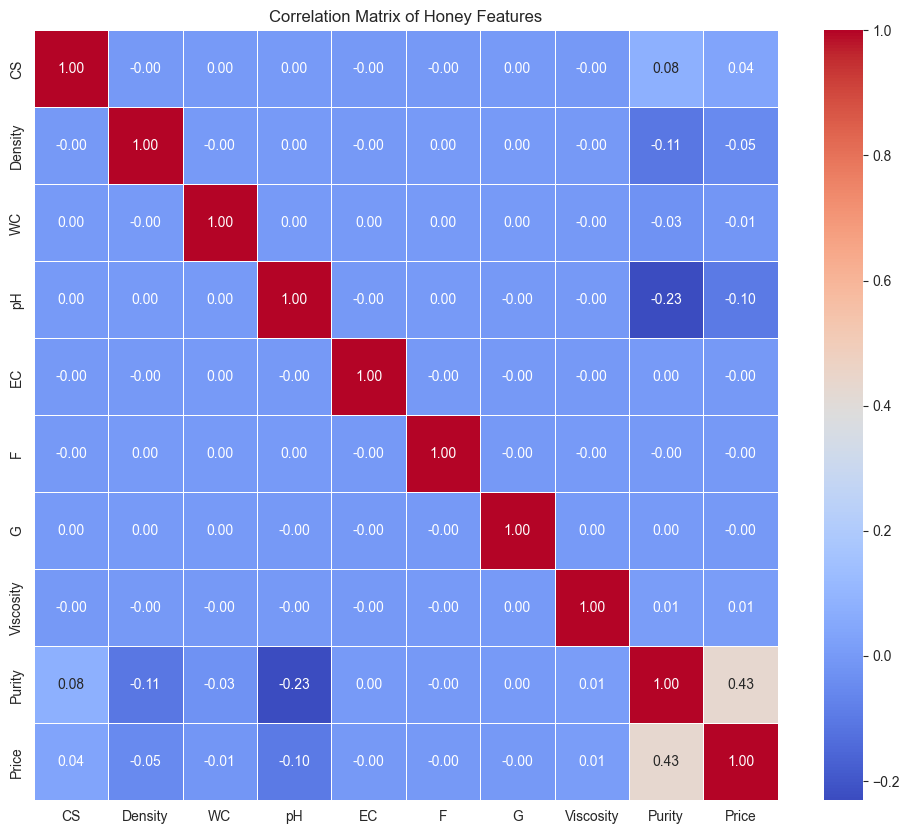

In [ ]:
if 'df' in locals():
    # Display the first 5 rows
    print("\nData Head:")
    display(df.head())

    # Display data types and non-null values
    print("\nData Info:")
    df.info()

    # Display summary statistics for numerical columns
    print("\nData Description:")
    display(df.describe())

    # --- Correlation Matrix Visualization ---
    print("\nCorrelation Matrix Heatmap:")
    plt.figure(figsize=(12, 10))
    # Ensure only numeric columns are used for correlation
    numeric_df = df.select_dtypes(include=np.number)
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Honey Features')
    plt.show()


**• `Price` shows strong positive correlation with `Purity`  and `Viscosity` **  
**• `pH` is weakly correlated with `Price`**  
**• `F` and `G` have moderate correlation**


Define Target and Features

## **Box Plot of Price by Pollen Type**  


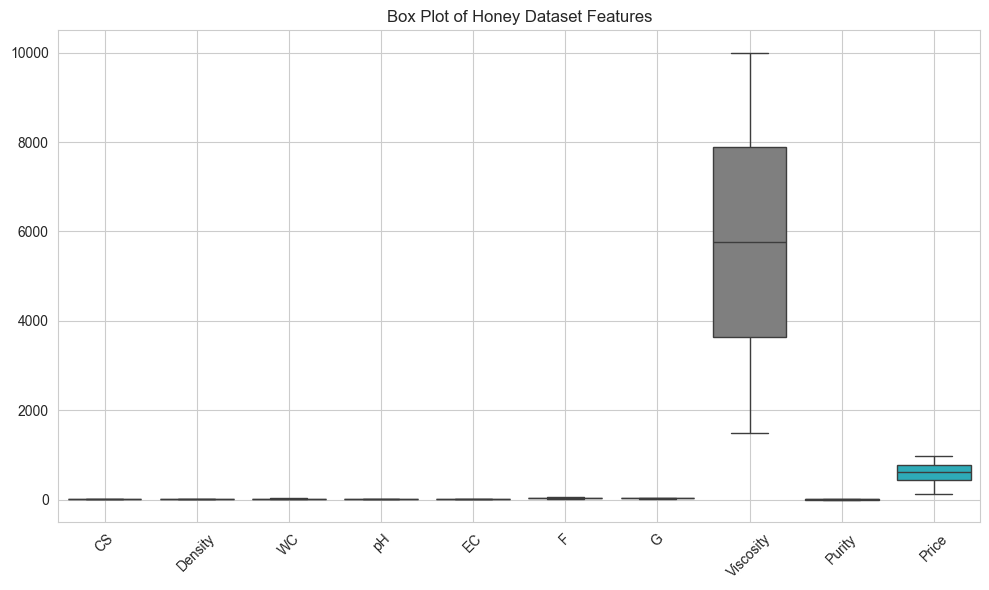

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Box plot for all numerical features
sns.boxplot(data=df)
plt.title('Box Plot of Honey Dataset Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**•`Chestnut` and `Blueberry` pollen types have higher median prices**  
**•`Alfalfa` shows more price variation and outliers**

In [ ]:
TARGET = 'Price'
X = df.drop(TARGET, axis=1)
y = df[TARGET]

One-Hot Encode the 'Pollen_analysis' column

This converts the text-based honey types into a numerical format for the model.

In [ ]:
X = pd.get_dummies(X, columns=['Pollen_analysis'], drop_first=True)

print("Feature set shape after one-hot encoding:", X.shape)
print("Example of features after encoding:")
display(X.head())

Feature set shape after one-hot encoding: (247903, 27)
Example of features after encoding:


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Pollen_analysis_Alfalfa,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,False,...,False,False,False,False,False,False,False,False,False,False
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,True,...,False,False,False,False,False,False,False,False,False,False
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,False,...,False,False,False,False,False,False,False,False,False,False
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,False,...,False,False,False,False,False,False,False,False,False,False
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,True,...,False,False,False,False,False,False,False,False,False,False


### Split the data into training and testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Print info of dataloaders

In [ ]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create the model

Here we are using Ridge Regression, Random Forest and Gradient Boosting, we will pick the best performing model (also which is not overfitting)

In [ ]:
# Define the models to be trained
models = {
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("--- Model Training and Evaluation ---")
best_model = None
best_r2 = -1
best_model_name = ""

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({'Model': name, 'R-squared': r2, 'MAE': mae})

    # Keep track of the best model based on R-squared
    if 98 > r2:
        best_r2 = r2
        best_model = model
        best_model_name = name

Print results in a clean table

In [ ]:
results_df = pd.DataFrame(results)
print("\n--- Evaluation Results ---")
display(results_df.sort_values(by='R-squared', ascending=False))

print(f"\n🏆 Best performing model is '{best_model_name}' with an R-squared of {best_r2:.4f}")

### Save the Best Model

In [ ]:
joblib.dump(best_model, 'best_model.pkl')
print(f"✅ Best model ('{best_model_name}') saved to 'best_model.pkl'")

Save the Column Order

This is CRUCIAL for ensuring the app's input matches the model's expectations.

In [ ]:
model_columns = X.columns
joblib.dump(model_columns, 'model_columns.pkl')
print(f"✅ Model columns saved to 'model_columns.pkl'")

Save the List of Pollen Types for the App's Dropdown Menu

This makes the app adaptable to the specific honey types in your dataset.

In [ ]:
pollen_types_list = sorted(df['Pollen_analysis'].unique().tolist())
joblib.dump(pollen_types_list, 'pollen_types.pkl')
print(f"✅ List of {len(pollen_types_list)} pollen types saved to 'pollen_types.pkl'")

In [ ]:
%%writefile app.py
# This is magic line command
# This command is for Notebooks. This command make this cell a python file

import streamlit as st
import pandas as pd
import joblib

# --- Caching Functions to Load Files ---
@st.cache_data
def load_model():
    """Loads the saved machine learning model."""
    model = joblib.load('best_model.pkl')
    return model

@st.cache_data
def load_columns():
    """Loads the list of model columns."""
    model_cols = joblib.load('model_columns.pkl')
    return model_cols

@st.cache_data
def load_pollen_types():
    """Loads the unique pollen types for the dropdown."""
    types = joblib.load('pollen_types.pkl')
    return types

# --- Load Artifacts ---
model = load_model()
model_columns = load_columns()
pollen_types = load_pollen_types()

# --- Page Configuration ---
st.set_page_config(
    page_title="Honey Price Predictor",
    page_icon="🍯",
    layout="centered"
)

# --- UI Elements ---
st.title("🍯 Honey Price Predictor")
st.write("""
Enter the characteristics of the honey to get a price prediction.
You can directly type the values or use the `+` and `-` buttons.
""")

# --- Input Form in Sidebar ---
st.sidebar.header("Input Honey Features:")

def user_input_features():
    """Creates sidebar elements and returns user inputs as a DataFrame."""
    pollen_analysis = st.sidebar.selectbox('Pollen Analysis (Type of Honey)', pollen_types)

    # --- All number_input fields now have step=0.01 and format="%.2f" ---
    cs = st.sidebar.number_input('Color (CS)', min_value=1.0, max_value=10.0, value=5.50, step=0.01, format="%.2f")
    density = st.sidebar.number_input('Density (g/cm³)', min_value=1.21, max_value=1.86, value=1.54, step=0.01, format="%.2f")
    wc = st.sidebar.number_input('Water Content (WC %)', min_value=12.0, max_value=25.0, value=18.50, step=0.01, format="%.2f")
    ph = st.sidebar.number_input('pH', min_value=2.50, max_value=7.50, value=5.00, step=0.01, format="%.2f")
    ec = st.sidebar.number_input('Electrical Conductivity (EC)', min_value=0.70, max_value=0.90, value=0.80, step=0.01, format="%.2f")
    f = st.sidebar.number_input('Fructose (F %)', min_value=20.0, max_value=50.0, value=34.97, step=0.01, format="%.2f")
    g = st.sidebar.number_input('Glucose (G %)', min_value=20.0, max_value=45.0, value=32.50, step=0.01, format="%.2f")
    viscosity = st.sidebar.number_input('Viscosity (mPa·s)', min_value=1500.0, max_value=10000.0, value=5753.0, step=0.01, format="%.2f")
    purity = st.sidebar.number_input('Purity (0.0 to 1.0 scale)', min_value=0.61, max_value=1.0, value=0.82, step=0.01, format="%.2f")

    data = {
        'CS': cs, 'Density': density, 'WC': wc, 'pH': ph, 'EC': ec, 'F': f, 'G': g,
        'Viscosity': viscosity, 'Purity': purity, 'Pollen_analysis': pollen_analysis
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Display the user's selected features in the main area
st.subheader('Your Input Features')
st.dataframe(input_df)

# --- Prediction Logic ---
if st.sidebar.button('Predict Price'):
    # Preprocess the input to match the model's training data
    processed_input = pd.get_dummies(input_df, columns=['Pollen_analysis'])

    # Align columns with the model's training columns, filling missing with 0
    final_input = processed_input.reindex(columns=model_columns, fill_value=0)

    # Make prediction
    prediction = model.predict(final_input)

    # Display prediction
    st.subheader('Predicted Price')
    st.success(f"**${prediction[0]:.2f}**")
else:
    st.sidebar.info("Adjust the values and click 'Predict Price' to see the result.")

In [ ]:
!streamlit run app.py

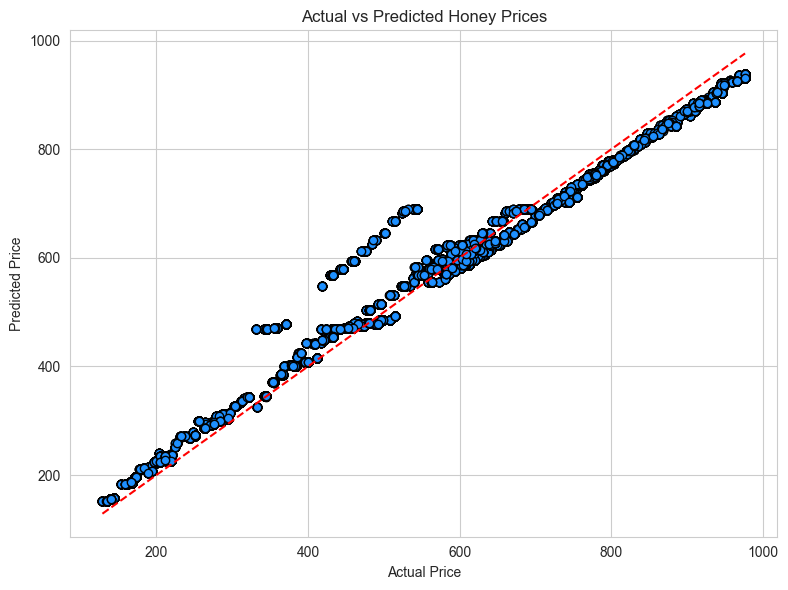

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Honey Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


**The model shows strong predictive ability overall**
**The majority of predictions are close to the actual prices**
**Random Forest or Gradient Boosting likely performed well if this is their result

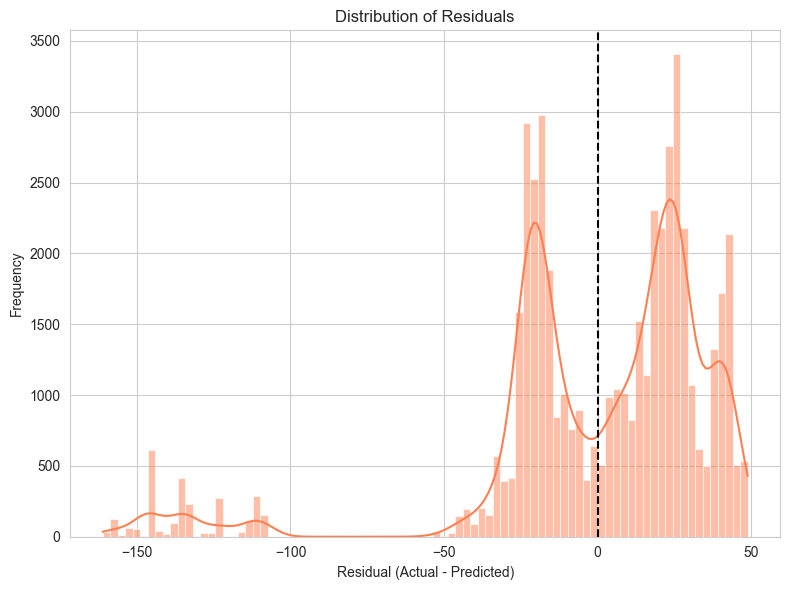

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='coral')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

**The plot shows a symmetrical bell-shaped curve, centered around 0.**
**This indicates that the model makes no systematic errors.**
**Errors are randomly distributed, which means the model doesn’t consistently overpredict or underpredict**